In [4]:
import pandas as pd

df = pd.read_csv('data_huang/huangtongfilter.smi',encoding = 'utf-8')
#df.drop_duplicates(keep='first', inplace=True) #去重
df = df.sample(frac=1.0)
cut_idx = int(round(0.9 * df.shape[0]))
print(cut_idx)
df_test, df_train = df.iloc[:cut_idx], df.iloc[cut_idx:]


df_test.to_csv(r"data_huang/huang_test90%.smi", index=None) #勉强可以，但是最前面一行会有数字
df_train.to_csv(r"data_huang/huang_train10%.smi", index=None)

4314


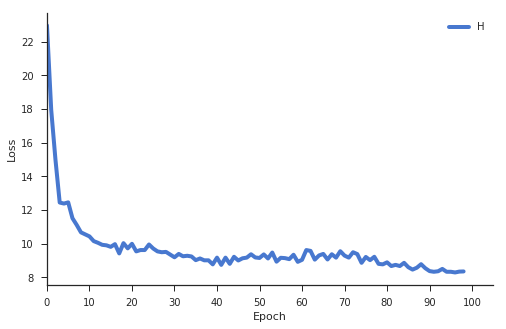

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
df = pd.read_csv( 'data_huang/loss-vaild-outkind.csv',header=None)

sns.set(style="ticks", palette="muted", color_codes=True)     #set( )设置主题，调色板更常用  
df.columns = ["loss","vaild_percent", "generatedcnt"]

loss = []
# dfloss = df.loss.data
# dfpercent = df.vaild_percent.data
for i,m in enumerate(df.loss):
    if i % 3 == 0:
        loss.append(m)
        
vaild = []       
for i,m in enumerate(df.vaild_percent):
    if i % 3 == 0:
        vaild.append(m)

        
        
plt.figure(figsize=(8, 5))


plt.plot(loss ,'b-',linewidth=4.0) 

plt.legend((u'Huangtong'),loc='best')
plt.xlabel('Epoch')  
plt.ylabel('Loss')  

# plt.title('Train Loss')
plt.xticks(np.arange(0, 110,10))
plt.xlim(0,105)
sns.despine()
#plt.plot(df.vaild_percent)
#plt.plot(df.generatedcnt)
plt.show()
# print(df.vaild_percent[:5])

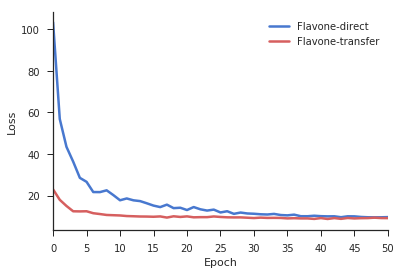

In [20]:
df_direct_huang= pd.read_csv( 'direct_huang/loss-vaild.csv',header=None)
df_direct_huang.columns = ["loss","vaild_percent", "generatedcnt"]

loss_dir = []
# dfloss = df.loss.data
# dfpercent = df.vaild_percent.data
# for i,m in enumerate(df_direct_huang.loss):
#     if i % 3 == 0:
#         loss_dir.append(m)

# plt.figure(figsize=(8, 5))


plt.plot(df_direct_huang.loss ,'b-',linewidth=2.5) 
plt.plot(loss ,'r-',linewidth=2.5) 

plt.legend((u'Flavone-direct','Flavone-transfer'),loc='best')
plt.xlabel('Epoch')  
plt.ylabel('Loss')  

# plt.title('Train Loss')
plt.xticks(np.arange(0, 55,5))
plt.xlim(0,50)
sns.despine()
#plt.plot(df.vaild_percent)
#plt.plot(df.generatedcnt)
plt.show()

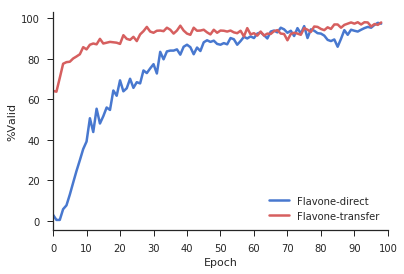

In [26]:

plt.plot(df_direct_huang.vaild_percent ,'b-',linewidth=2.5) 
plt.plot(vaild ,'r-',linewidth=2.5) 

plt.legend((u'Flavone-direct','Flavone-transfer'),loc='best')
plt.xlabel('Epoch')  
plt.ylabel('%Valid')  

# plt.title('Train Loss')
plt.xticks(np.arange(0, 105,10))
plt.xlim(0,100)
sns.despine()
#plt.plot(df.vaild_percent)
#plt.plot(df.generatedcnt)
plt.show()

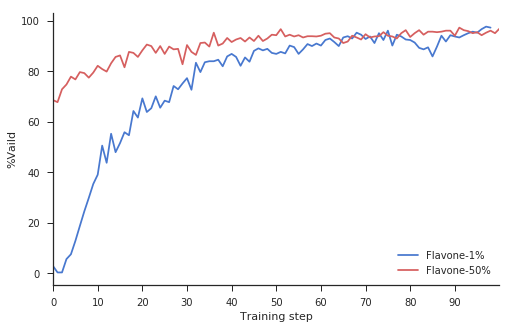

In [10]:
df_direct_huang= pd.read_csv( 'direct_huang/loss-vaild.csv',header=None)
df_direct_xiang = pd.read_csv( 'direct_xiang/loss-vaild.csv',header=None)
df_direct_huang.columns = ["loss","vaild_percent", "generatedcnt"]
df_direct_xiang.columns = ["loss","vaild_percent", "generatedcnt"]


sns.set(style="ticks", palette="muted", color_codes=True)
plt.figure(figsize=(8, 5))

plt.plot(df_direct_huang.vaild_percent,'b-')
plt.plot(df.vaild_percent,'r-')


plt.legend(('Flavone-1%','Flavone-50%'),loc='best')
plt.xlabel('Training step')  
plt.ylabel('%Vaild')  

# plt.title('Train Loss')
plt.xticks(np.arange(0, 100,10))
plt.xlim(0,100)
sns.despine()



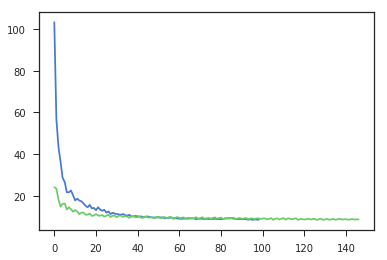

In [6]:
plt.plot(df_direct_huang.loss)
plt.plot(df.loss)


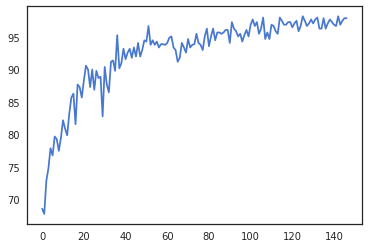

In [6]:
plt.plot(df.vaild_percent)
plt.show()

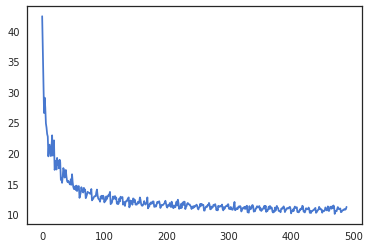

0    55.7
1    55.9
2    55.1
3    52.1
4    52.5
Name: vaild_percent, dtype: float64


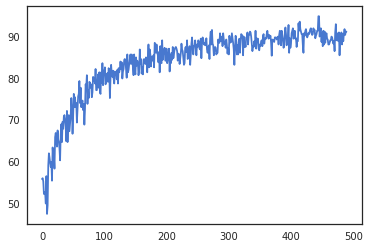

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
df = pd.read_csv( 'data_xiang/loss-vaild.csv',header=None)

sns.set(style="white", palette="muted", color_codes=True)     #set( )设置主题，调色板更常用  
df.columns = ["loss","vaild_percent", "generatedcnt"]

plt.plot(df.loss)  
#plt.plot(df.vaild_percent)
#plt.plot(df.generatedcnt)
plt.show()
print(df.vaild_percent[:5])
plt.plot(df.vaild_percent)
plt.show()

In [1]:
from rdkit import Chem
from rdkit import rdBase
from rdkit.Chem import AllChem
from rdkit import DataStructs

lines = Chem.SmilesMolSupplier('data_huang/filtered21882.smi')
sub = Chem.MolFromMolFile('data_huang/huangtong.mol')

mols = [x for x in lines]

len(mols)


21881

In [2]:
sublist = []
for index, mol in enumerate(lines):
    if mol:
        if mol.HasSubstructMatch(sub):
            sublist.append(index)

19386
[0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 21]


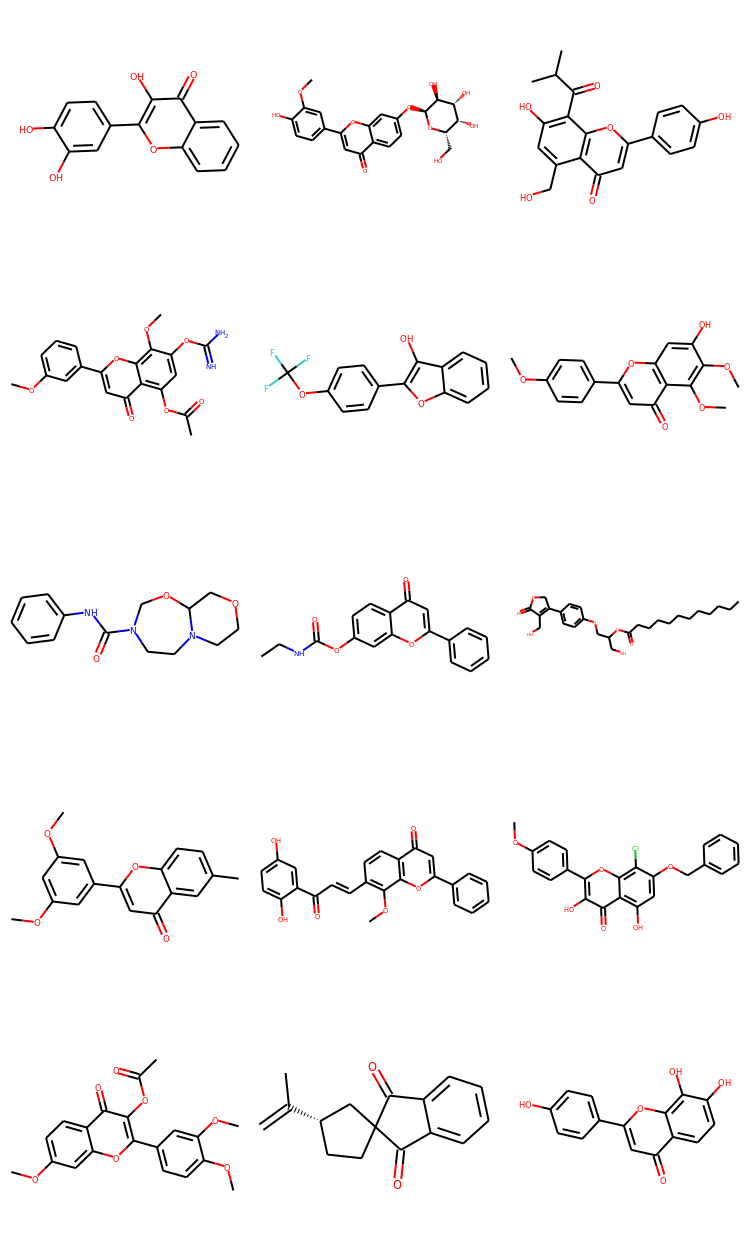

In [11]:
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
print(len(sublist))

AllChem.Compute2DCoords(sub)
Draw.MolToImage(sub)

# line8 = [x for x in mols[:] if x is not None]
for m in mols[:15]: tmp= AllChem.Compute2DCoords(m)


print(sublist[:15])
Draw.MolsToGridImage(mols[:15],molsPerRow=3,subImgSize=(250,250))

In [38]:
lines_filter = Chem.SmilesMolSupplier('data/unique-cano-nature product.smi')
sub = Chem.MolFromMolFile('data_huang/huangtong.mol')

mols = [x for x in lines_filter]
print(len(mols))

sublist_filter = []
for i, mol1 in enumerate(lines_filter):
    if mol1.HasSubstructMatch(sub) 
        sublist_filter.append(i)

len(sublist_filter)

SyntaxError: invalid syntax (<ipython-input-38-8e0a85897164>, line 9)

In [43]:
from rdkit import Chem
from rdkit import rdBase
from rdkit.Chem import AllChem
from rdkit import DataStructs

lines_filter = Chem.SmilesMolSupplier('data_out/huangdup-4W.smi')
sub = Chem.MolFromMolFile('data_huang/huangtong.mol')

mols = [Chem.MolToSmiles(x,isomericSmiles=True) for x in lines_filter]
print(len(mols))

        
        



36852


In [58]:
print(mols[0])
sublist_filter = []
for i,mol in enumerate(mols):
    mol = Chem.MolFromSmiles(mol)
    if not mol.HasSubstructMatch(sub):
        sublist_filter.append(i)
        
len(sublist_filter)
print(sublist_filter[:5])

O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12
[1, 3, 4, 5, 6]


In [59]:
print(sublist_filter)

[1, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 34, 35, 37, 38, 39, 40, 41, 46, 48, 49, 50, 52, 56, 60, 61, 62, 65, 66, 70, 71, 74, 77, 78, 79, 80, 82, 83, 87, 89, 90, 91, 93, 95, 96, 98, 99, 101, 103, 104, 107, 108, 110, 111, 112, 113, 115, 116, 118, 119, 121, 122, 124, 127, 129, 130, 132, 136, 137, 140, 141, 146, 147, 148, 150, 151, 152, 154, 155, 157, 158, 159, 160, 161, 167, 168, 169, 170, 171, 172, 174, 176, 177, 179, 181, 183, 184, 185, 186, 189, 196, 197, 201, 202, 203, 206, 209, 212, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 228, 230, 231, 233, 234, 235, 240, 241, 242, 243, 245, 246, 247, 248, 250, 252, 256, 260, 262, 263, 267, 268, 270, 272, 273, 274, 275, 277, 279, 280, 283, 284, 285, 286, 288, 291, 294, 297, 300, 301, 302, 303, 304, 310, 313, 314, 317, 318, 319, 321, 322, 324, 326, 330, 332, 333, 334, 341, 342, 344, 350, 351, 353, 364, 366, 367, 369, 370, 372, 377, 381, 384, 385, 389, 391, 394, 399, 402, 403, 40

/home/zhengsj/.conda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


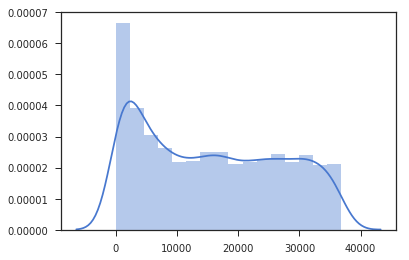

In [51]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# plt.plot(sublist)
# plt.plot(sublist_filter)
# plt.show()
sns.distplot(sublist_filter)

In [57]:
with open('data_out/xiangdup-8W.smi', 'r') as f:
        smiles_list = []
        for i, line in enumerate(f):
            if i % 10000 == 0:
                print("{} lines processed.".format(i))
            smiles = line.split(" ")[0]
            mol = Chem.MolFromSmiles(smiles)
            smiles_list.append(Chem.MolToSmiles(mol))
            

    
subxiang = Chem.MolFromMolFile('data_xiang/xiangdousu.mol')
len(smiles_list)


0 lines processed.


ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=False, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False)

In [56]:
molx = [Chem.MolToSmiles(x,isomericSmiles=True) for x in lines_filterxiang]

sublist_filterxiang = []
for i,mol in enumerate(lines_filterxiang):
    mol = Chem.MolFromSmiles(mol)
    if not mol.HasSubstructMatch(subxiang):
        sublist_filterxiang.append(i)
        
len(sublist_filterxiang)


ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=False, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False)

In [14]:
subxiang = Chem.MolFromMolFile('data_xiang/xiangdousu.mol')
subxiang_filter = []
for i, mol in enumerate(lines_filter):
    if mol.HasSubstructMatch(subxiang):
        subxiang_filter.append(mol)
print(len(subxiang_filter))

subhuang_filter = []
for j, molk in enumerate(lines_filter):
    if molk.HasSubstructMatch(sub):
        subxiang_filter.append(molk)
        
print(len(subhuang_filter))


2166
0


In [ ]:
sublist_filter = []
for i, mol1 in enumerate(lines_filter):
    if mol1.HasSubstructMatch(sub):
        sublist_filter.append(mol1)

len(sublist_filter)

In [ ]:
sethuang = set(subhuang_filter)
setxiang = set(subxiang_filter)
setall = set(lines_filter)

setout = setall - sethuang - setxiang
print(len(setout))

In [ ]:
with open('filteredhuangandxiang.smi', 'w') as f:
        
        for i, line in enumerate(list(set3)):
            f.write(line + '')

/home/zhengsj/.conda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


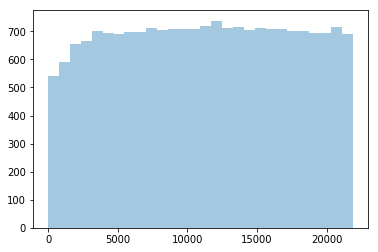

In [41]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# plt.plot(sublist)
sns.distplot(sublist, kde=False)
plt.show()